# Collaboration and Competition

---

Congratulations for completing the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control agents in a more challenging environment, where the goal is to train a team of agents to play soccer.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Soccer.app"`
- **Windows** (x86): `"path/to/Soccer_Windows_x86/Soccer.exe"`
- **Windows** (x86_64): `"path/to/Soccer_Windows_x86_64/Soccer.exe"`
- **Linux** (x86): `"path/to/Soccer_Linux/Soccer.x86"`
- **Linux** (x86_64): `"path/to/Soccer_Linux/Soccer.x86_64"`
- **Linux** (x86, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86"`
- **Linux** (x86_64, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86_64"`

For instance, if you are using a Mac, then you downloaded `Soccer.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Soccer.app")
```

In [2]:
env = UnityEnvironment(file_name="Soccer_Windows_x86_64/Soccer.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 2
        Number of External Brains : 2
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: GoalieBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Unity brain name: StrikerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 6
        Vector Action descriptions: , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we obtain separate brains for the striker and goalie agents.

In [3]:
# print the brain names
print(env.brain_names)

# set the goalie brain
g_brain_name = env.brain_names[0]
g_brain = env.brains[g_brain_name]

# set the striker brain
s_brain_name = env.brain_names[1]
s_brain = env.brains[s_brain_name]

['GoalieBrain', 'StrikerBrain']


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)

# number of agents 
num_g_agents = len(env_info[g_brain_name].agents)
print('Number of goalie agents:', num_g_agents)
num_s_agents = len(env_info[s_brain_name].agents)
print('Number of striker agents:', num_s_agents)

# number of actions
g_action_size = g_brain.vector_action_space_size
print('Number of goalie actions:', g_action_size)
s_action_size = s_brain.vector_action_space_size
print('Number of striker actions:', s_action_size)

# examine the state space 
g_states = env_info[g_brain_name].vector_observations
g_state_size = g_states.shape[1]
print('There are {} goalie agents. Each receives a state with length: {}'.format(g_states.shape[0], g_state_size))
s_states = env_info[s_brain_name].vector_observations
s_state_size = s_states.shape[1]
print('There are {} striker agents. Each receives a state with length: {}'.format(s_states.shape[0], s_state_size))

max_action_size = max(g_action_size, s_action_size)

Number of goalie agents: 2
Number of striker agents: 2
Number of goalie actions: 4
Number of striker actions: 6
There are 2 goalie agents. Each receives a state with length: 336
There are 2 striker agents. Each receives a state with length: 336


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1):                                         # play game for 2 episodes
    env_info = env.reset(train_mode=False)                 # reset the environment    
    g_states = env_info[g_brain_name].vector_observations  # get initial state (goalies)
    s_states = env_info[s_brain_name].vector_observations  # get initial state (strikers)
    g_scores = np.zeros(num_g_agents)                      # initialize the score (goalies)
    s_scores = np.zeros(num_s_agents)                      # initialize the score (strikers)
    for i in range(1):
        # select actions and send to environment
        g_actions = np.random.randint(g_action_size, size=num_g_agents)
        print("g_actions ", g_actions)
        s_actions = np.random.randint(s_action_size, size=num_s_agents)
        print("s_actions ", s_actions)
        actions = dict(zip([g_brain_name, s_brain_name], 
                           [g_actions, s_actions]))

        print(actions)

        env_info = env.step(actions)
        
        # get next states
        g_next_states = env_info[g_brain_name].vector_observations         
        s_next_states = env_info[s_brain_name].vector_observations
        
        # get reward and update scores
        g_rewards = env_info[g_brain_name].rewards  
        s_rewards = env_info[s_brain_name].rewards
        g_scores += g_rewards
        s_scores += s_rewards
        
        # check if episode finished
        done = np.any(env_info[g_brain_name].local_done)  
        
        # roll over states to next time step
        g_states = g_next_states
        s_states = s_next_states
        
        # exit loop if episode finished
        if done:                                           
            break
    print('Scores from episode {}: {} (goalies), {} (strikers)'.format(i+1, g_scores, s_scores))

g_actions  [1 0]
s_actions  [3 2]
{'GoalieBrain': array([1, 0]), 'StrikerBrain': array([3, 2])}
Scores from episode 1: [0.00166667 0.00166667] (goalies), [-0.00166667 -0.00166667] (strikers)


### 4. Train the agent
Run the 2 next cells

In [6]:
import math
from collections import deque
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from maddpg import MaddpgAgent



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def evaluate(g_agent, s_agent, env):
    
    gamma=1.0
    max_t=5000

    env_info = env.reset(train_mode=True)
    g_states = env_info[g_brain_name].vector_observations
    s_states = env_info[s_brain_name].vector_observations
    episode_return = np.zeros(num_g_agents + num_s_agents)
    for t in range(max_t):
        g_actions = g_agent.act(g_states)
        s_actions = s_agent.act(s_states)

        g_max_index = np.argmax(g_actions, 1)
        s_max_index = np.argmax(s_actions, 1)

        actions = dict(zip([g_brain_name, s_brain_name], 
                           [g_max_index, s_max_index]))

        env_info = env.step(actions) 

        g_actions = np.zeros((num_g_agents, g_action_size))
        s_actions = np.zeros((num_s_agents, s_action_size))

        for i in range(num_g_agents):
            g_actions[i, g_max_index[i]] = 1.0
        for i in range(num_s_agents):
            s_actions[i, s_max_index[i]] = 1.0

        g_next_states = env_info[g_brain_name].vector_observations
        s_next_states = env_info[s_brain_name].vector_observations

        g_rewards = env_info[g_brain_name].rewards
        s_rewards = env_info[s_brain_name].rewards

        g_dones = env_info[g_brain_name].local_done
        s_dones = env_info[s_brain_name].local_done

        g_agent.step(g_states, g_actions, g_rewards, g_next_states, g_dones)
        s_agent.step(s_states, s_actions, s_rewards, s_next_states, s_dones)

        rewards = np.concatenate((g_rewards, s_rewards))
        
        episode_return = episode_return + rewards
        g_states = g_next_states
        s_states = s_next_states

        if np.array(g_dones).any() or np.array(s_dones).any():
            break

    return episode_return


def train(n_iterations=1500, gamma=1.0, print_every=20):
   
    np.random.seed(10)

    g_agent = MaddpgAgent(num_g_agents, g_state_size, g_action_size, 10)
    s_agent = MaddpgAgent(num_s_agents, s_state_size, s_action_size, 10)
    g_agent.load("goal")
    s_agent.load("strike")

    scores_deque = deque(maxlen=100)
    scores = []
  
    for i_iteration in range(1, n_iterations+1):
        
        rewards = evaluate(g_agent, s_agent, env)       
        max_reward = np.amax(rewards)
        scores_deque.append(max_reward)
        avg_score = np.mean(scores_deque)
        scores.append(avg_score)
        
        if i_iteration % print_every == 0:
            print('Episode {}\tAverage  Max Score: {:.8f}  Exploration: {:.4f} '.format(i_iteration, max_reward, g_agent.exploration), end='')
            print("  Rewards: ",rewards)
            g_agent.save("goal")
            s_agent.save("strike")
    return scores

Episode 20	Average  Max Score: 0.57666672  Exploration: 0.9983   Rewards:  [ 0.52333334 -0.57666672  0.57666672 -0.52333334]
Episode 40	Average  Max Score: 0.89666669  Exploration: 0.9968   Rewards:  [ 0.89666669 -0.20333332  0.20333332 -0.89666669]
Episode 60	Average  Max Score: 0.83500012  Exploration: 0.9953   Rewards:  [ 0.265      -0.83500012  0.83500012 -0.265     ]
Episode 80	Average  Max Score: 0.96166673  Exploration: 0.9940   Rewards:  [ 0.13833333 -0.96166673  0.96166673 -0.13833333]
Episode 100	Average  Max Score: 0.90333333  Exploration: 0.9926   Rewards:  [ 0.19666667 -0.90333333  0.90333333 -0.19666667]
Episode 120	Average  Max Score: 0.74333333  Exploration: 0.9913   Rewards:  [-0.74333333  0.35666667 -0.35666667  0.74333333]
Episode 140	Average  Max Score: 1.00166669  Exploration: 0.9898   Rewards:  [ 1.00166669  1.00166669 -1.00166669 -1.00166669]
Episode 160	Average  Max Score: 0.84000000  Exploration: 0.9889   Rewards:  [ 0.26 -0.84  0.84 -0.26]
Episode 180	Average 

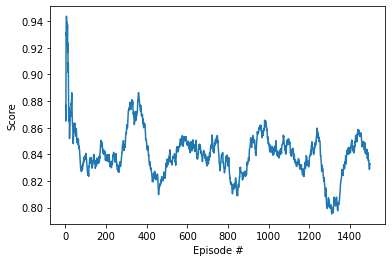

In [7]:
scores = train()  

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("maddpg.png")
plt.show()

When finished, you can close the environment.

### 4. Watch the train agent


In [8]:

g_agent = MaddpgAgent(num_g_agents, g_state_size, g_action_size, 10)
s_agent = MaddpgAgent(num_s_agents, s_state_size, s_action_size, 10)

g_agent.load("goal")
s_agent.load("strike")

for _ in range(5):
    env_info = env.reset(train_mode=False)
    g_states = env_info[g_brain_name].vector_observations
    s_states = env_info[s_brain_name].vector_observations
    episode_return = np.zeros(num_g_agents + num_s_agents)
    while True:
        g_actions = g_agent.act(g_states)
        s_actions = s_agent.act(s_states)

        g_max_index = np.argmax(g_actions, 1)
        s_max_index = np.argmax(s_actions, 1)

        actions = dict(zip([g_brain_name, s_brain_name], 
                            [g_max_index, s_max_index]))

        env_info = env.step(actions) 

        g_rewards = env_info[g_brain_name].rewards
        s_rewards = env_info[s_brain_name].rewards

        g_dones = env_info[g_brain_name].local_done
        s_dones = env_info[s_brain_name].local_done

        rewards = np.concatenate((g_rewards, s_rewards))

        episode_return = episode_return + rewards
        g_states = g_next_states
        s_states = s_next_states

        if np.array(g_dones).any() or np.array(s_dones).any():
            print("Rewards: ", rewards)
            break

Rewards:  [ 0.10166666 -0.99833345  0.99833345 -0.10166666]
Rewards:  [ 0.00166667  0.00166667 -0.00166667 -0.00166667]
Rewards:  [-0.99833345  0.10166666 -0.10166666  0.99833345]
Rewards:  [-0.99833345  0.10166666 -0.10166666  0.99833345]
Rewards:  [-0.99833333  0.10166667 -0.10166667  0.99833333]


In [9]:
env.close()